For the experiments with GINCO, I'll use the text, marked with "keep".

In [1]:
import pandas as pd

In [2]:
from operator import index


file = pd.read_csv("data/GINCO-MT-GINCO-keeptext-file-with-all-information.csv", sep="\t", index_col = 0)

file

,id,url,crawled,hard,primary_level_1,primary_level_2,primary_level_3,secondary_level_1,secondary_level_2,secondary_level_3,...,tertiary_level_2,tertiary_level_3,split,domain,GINCORE,Slovene_text,MT_text,text_length,FTD_pred_on_SL,FTD_pred_on_MT
0,3949,http://www.pomurje.si/aktualno/sport/zimska-li...,2014,False,News/Reporting,News/Reporting,News/Reporting,NaN,NaN,NaN,...,NaN,NaN,test,www.pomurje.si,News,"Šport <p/> Zimska liga malega nogometa sobota,...",Sport <p/> Winter Little League Football Satur...,93,A8 (news),A8 (news)
1,3726,http://www.ss-sezana.si/sss/index.php?option=c...,2014,False,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN,NaN,...,NaN,NaN,train,www.ss-sezana.si,Information/Explanation,JEDILNIK <p/> Iskalnik <p/> Poglavitni cilj pr...,JEDILNIK <p/> Search <p/> The main objective o...,76,A16 (information),A16 (information)
2,5621,http://www.kamnik-starejsi.si/novice/144-sodel...,2014,False,Promotion of Services,Promotion of Services,Promotion,Opinion/Argumentation,Opinion/Argumentation,Opinion/Argumentation,...,Information/Explanation,Information/Explanation,train,www.kamnik-starejsi.si,Promotion,Projekt INNOVAge in zavod Oreli <p/> Zavod Ore...,Project INNOVAge and the Oreli Institute <p/> ...,232,A12 (promotion),A12 (promotion)
3,3776,http://www.radiocelje.si/novica.php?id=13007&a...,2014,False,News/Reporting,News/Reporting,News/Reporting,NaN,NaN,NaN,...,NaN,NaN,train,www.radiocelje.si,News,"V novembru, mesecu preprečevanja odvisnosti, b...","In November, the month of addiction prevention...",158,A8 (news),A8 (news)
4,2102,http://www.mtv.si/novice/selena-gomez-ponudila...,2014,False,Opinionated News,Opinionated News,Opinionated News,NaN,NaN,NaN,...,NaN,NaN,test,www.mtv.si,News,Selena Gomez ponudila v poslušanje novi album ...,Selena Gomez launches new album <p/> 16.07.201...,63,A8 (news),A8 (news)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,374730,http://khetanes.si/sl-si/produkti/projektne-no...,2021,False,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN,NaN,...,Promotion of a Product,Promotion,train,khetanes.si,Information/Explanation,Projektne novine <p/> Promocijski projektni ča...,Project News <p/> Promotional project newspape...,86,A12 (promotion),A8 (news)
998,476885,https://www.merkur.si/navigacija/nasveti/kopal...,2021,False,List of Summaries/Excerpts,List of Summaries/Excerpts,List of Summaries/Excerpts,NaN,NaN,NaN,...,NaN,NaN,train,www.merkur.si,List of Summaries/Excerpts,V raznoliki ponudbi tušev izberite popolno raz...,Choose the perfect shower to match your taste ...,50,A12 (promotion),A12 (promotion)
999,674213,http://www.sex2.si/category/ocene-izdelkov/,2021,False,List of Summaries/Excerpts,List of Summaries/Excerpts,List of Summaries/Excerpts,NaN,NaN,NaN,...,NaN,NaN,train,www.sex2.si,List of Summaries/Excerpts,"O izdelku Za znamko Dame stojita dve ženski, z...",About the product There are two women behind t...,295,A12 (promotion),A12 (promotion)
1000,975590,http://www.ipsos.si/VodenjeVIZ_VI_past_dvojne_...,2021,False,Opinion/Argumentation,Opinion/Argumentation,Opinion/Argumentation,NaN,NaN,NaN,...,NaN,NaN,train,www.ipsos.si,Opinion/Argumentation,Razprava pogosto potegne na plano najprej tist...,The debate often brings to the surface first t...,409,A1 (argumentative),A1 (argumentative)


In [87]:
file.head(1)

,id,url,crawled,hard,primary_level_1,primary_level_2,primary_level_3,secondary_level_1,secondary_level_2,secondary_level_3,...,tertiary_level_2,tertiary_level_3,split,domain,GINCORE,Slovene_text,MT_text,text_length,FTD_pred_on_SL,FTD_pred_on_MT
0,3949,http://www.pomurje.si/aktualno/sport/zimska-li...,2014,False,News/Reporting,News/Reporting,News/Reporting,NaN,NaN,NaN,...,NaN,NaN,test,www.pomurje.si,News,"Šport <p/> Zimska liga malega nogometa sobota,...",Sport <p/> Winter Little League Football Satur...,93,A8 (news),A8 (news)


In [85]:
file.columns

Index(['id', 'url', 'crawled', 'hard', 'primary_level_1', 'primary_level_2',
       'primary_level_3', 'secondary_level_1', 'secondary_level_2',
       'secondary_level_3', 'tertiary_level_1', 'tertiary_level_2',
       'tertiary_level_3', 'split', 'domain', 'GINCORE', 'Slovene_text',
       'MT_text', 'text_length', 'FTD_pred_on_SL', 'FTD_pred_on_MT'],
      dtype='object')

In [3]:
file.primary_level_3.value_counts()

Promotion                     209
Information/Explanation       139
Opinion/Argumentation         131
News/Reporting                115
List of Summaries/Excerpts    106
Opinionated News               89
Other                          75
Forum                          52
Instruction                    44
Legal/Regulation               17
Announcement                   17
Interview                       8
Name: primary_level_3, dtype: int64

In [ ]:
# We will also create a version of GINCO with a smaller set of labels to see if this would improve the results.
# The primary_level_3 already consists of merged instances. The labels were downcasted in the following way:
{"Script/Drama":"Other", "Lyrical":"Other","FAQ":"Other","Recipe":"Instruction", "Research Article":"Information/Explanation", "Review":"Opinion/Argumentation", "Promotion of Services":"Promotion", "Promotion of a Product":"Promotion", "Invitation":"Promotion", "Correspondence":"Other", "Prose":"Other", "Call":"Other"}

In [117]:
file.shape

(1002, 21)

In [88]:
# Create a df for the simple transformers - with primary_level_1 as the labels and Slovene text as text
df = file[["Slovene_text","primary_level_1", "text_length"]]

df

,Slovene_text,primary_level_1,text_length
0,"Šport <p/> Zimska liga malega nogometa sobota,...",News/Reporting,93
1,JEDILNIK <p/> Iskalnik <p/> Poglavitni cilj pr...,Information/Explanation,76
2,Projekt INNOVAge in zavod Oreli <p/> Zavod Ore...,Promotion of Services,232
3,"V novembru, mesecu preprečevanja odvisnosti, b...",News/Reporting,158
4,Selena Gomez ponudila v poslušanje novi album ...,Opinionated News,63
...,...,...,...
997,Projektne novine <p/> Promocijski projektni ča...,Information/Explanation,86
998,V raznoliki ponudbi tušev izberite popolno raz...,List of Summaries/Excerpts,50
999,"O izdelku Za znamko Dame stojita dve ženski, z...",List of Summaries/Excerpts,295
1000,Razprava pogosto potegne na plano najprej tist...,Opinion/Argumentation,409


In [89]:
df.columns = ["text", "labels", "text_length"]

In [90]:
# Analyze text length
print(df.text_length.describe().to_markdown())

|       |   text_length |
|:------|--------------:|
| count |      1002     |
| mean  |       362.159 |
| std   |       483.747 |
| min   |        12     |
| 25%   |        98     |
| 50%   |       208     |
| 75%   |       418.75  |
| max   |      4364     |


In [91]:
df.labels.value_counts()

Information/Explanation       130
News/Reporting                115
Promotion of a Product        115
Opinion/Argumentation         114
List of Summaries/Excerpts    106
Opinionated News               89
Forum                          52
Instruction                    38
Other                          34
Invitation                     32
Promotion of Services          32
Promotion                      30
Legal/Regulation               17
Announcement                   17
Review                         17
Correspondence                 16
Call                           11
Research Article                9
Interview                       8
Recipe                          6
Prose                           6
Lyrical                         4
FAQ                             3
Script/Drama                    1
Name: labels, dtype: int64

In [92]:
# Analyze label distribution
count = pd.DataFrame({"Count": list(df.labels.value_counts()), "Percentage": list(df.labels.value_counts(normalize=True))}, index = df.labels.value_counts().index)

print(count.to_markdown())

|                            |   Count |   Percentage |
|:---------------------------|--------:|-------------:|
| Information/Explanation    |     130 |  0.129741    |
| News/Reporting             |     115 |  0.11477     |
| Promotion of a Product     |     115 |  0.11477     |
| Opinion/Argumentation      |     114 |  0.113772    |
| List of Summaries/Excerpts |     106 |  0.105788    |
| Opinionated News           |      89 |  0.0888224   |
| Forum                      |      52 |  0.0518962   |
| Instruction                |      38 |  0.0379242   |
| Other                      |      34 |  0.0339321   |
| Invitation                 |      32 |  0.0319361   |
| Promotion of Services      |      32 |  0.0319361   |
| Promotion                  |      30 |  0.0299401   |
| Legal/Regulation           |      17 |  0.0169661   |
| Announcement               |      17 |  0.0169661   |
| Review                     |      17 |  0.0169661   |
| Correspondence             |      16 |  0.0159

In [93]:
df.head()

,text,labels,text_length
0,"Šport <p/> Zimska liga malega nogometa sobota,...",News/Reporting,93
1,JEDILNIK <p/> Iskalnik <p/> Poglavitni cilj pr...,Information/Explanation,76
2,Projekt INNOVAge in zavod Oreli <p/> Zavod Ore...,Promotion of Services,232
3,"V novembru, mesecu preprečevanja odvisnosti, b...",News/Reporting,158
4,Selena Gomez ponudila v poslušanje novi album ...,Opinionated News,63


In [94]:
# Discard labels, smaller than 10
df = df[df["labels"] != "Research Article"]
df = df[df["labels"] != "Interview"]
df = df[df["labels"] != "Recipe"]
df = df[df["labels"] != "Prose"]
df = df[df["labels"] != "Lyrical"]
df = df[df["labels"] != "FAQ"]
df = df[df["labels"] != "Script/Drama"]

df.head(3)

,text,labels,text_length
0,"Šport <p/> Zimska liga malega nogometa sobota,...",News/Reporting,93
1,JEDILNIK <p/> Iskalnik <p/> Poglavitni cilj pr...,Information/Explanation,76
2,Projekt INNOVAge in zavod Oreli <p/> Zavod Ore...,Promotion of Services,232


In [54]:
# Discard the third column (text_length)
df = df.drop(columns=["text_length"])
df.head(1)

,text,labels
0,"Šport <p/> Zimska liga malega nogometa sobota,...",News/Reporting


In [55]:
# Check the distribution of labels
df.labels.value_counts()

Information/Explanation       130
News/Reporting                115
Promotion of a Product        115
Opinion/Argumentation         114
List of Summaries/Excerpts    106
Opinionated News               89
Forum                          52
Instruction                    38
Other                          34
Invitation                     32
Promotion of Services          32
Promotion                      30
Legal/Regulation               17
Announcement                   17
Review                         17
Correspondence                 16
Call                           11
Name: labels, dtype: int64

In [56]:
# Get information on the sheet
df.describe(include="all")

,text,labels
count,965,965
unique,965,17
top,"Šport <p/> Zimska liga malega nogometa sobota,...",Information/Explanation
freq,1,130


## Split the SL-GINCO

In [57]:
# Split the dataset (stratified split according to the label)
from sklearn.model_selection import train_test_split

train, devtest = train_test_split(df, test_size=0.4, random_state=42, shuffle = True, stratify = df.labels)

In [58]:
test, dev = train_test_split(devtest, test_size=0.5, random_state=42, shuffle = True, stratify = devtest.labels)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

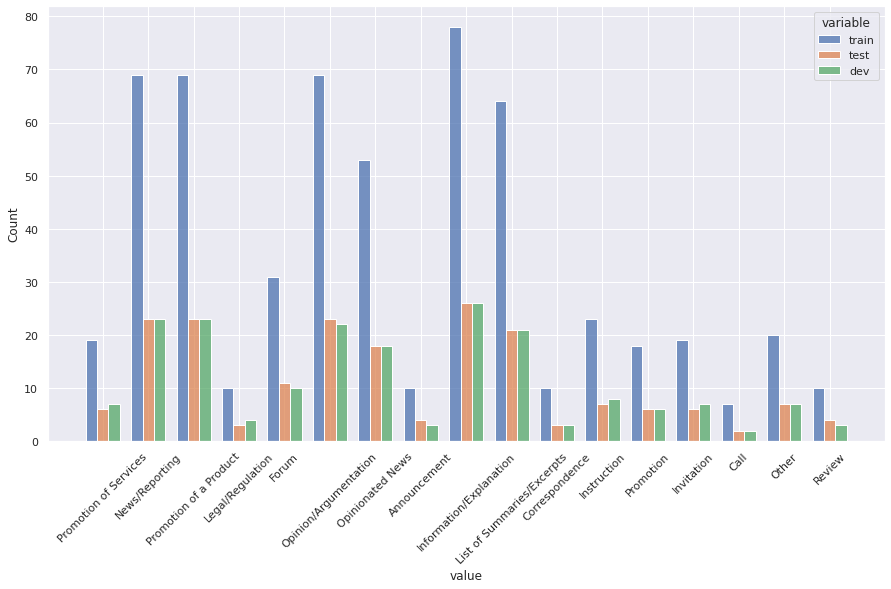

In [59]:
# Observe the distribution of the labels in all sets.
import matplotlib.pyplot as plt
import seaborn as sns

# make dataframe
merged_df = pd.DataFrame({"train":train.labels, "test":test.labels, "dev": dev.labels})

# plot melted dataframe in a single command
sns.set(rc = {'figure.figsize':(15,8)})

sns.histplot(merged_df.melt(), x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=20)

plt.xticks(rotation=45)

In [60]:
merged_df.describe()

,train,test,dev
count,579,193,193
unique,17,17,17
top,Information/Explanation,Information/Explanation,Information/Explanation
freq,78,26,26


In [61]:
# Save the new files as CSV
train.to_csv("data/GINCO-full-set-train.csv")
test.to_csv("data/GINCO-full-set-test.csv")
dev.to_csv("data/GINCO-full-set-dev.csv")

## Add information to the main sheet

In [95]:
# Add information about the splits to the main table
file.head(1)

,id,url,crawled,hard,primary_level_1,primary_level_2,primary_level_3,secondary_level_1,secondary_level_2,secondary_level_3,...,tertiary_level_2,tertiary_level_3,split,domain,GINCORE,Slovene_text,MT_text,text_length,FTD_pred_on_SL,FTD_pred_on_MT
0,3949,http://www.pomurje.si/aktualno/sport/zimska-li...,2014,False,News/Reporting,News/Reporting,News/Reporting,NaN,NaN,NaN,...,NaN,NaN,test,www.pomurje.si,News,"Šport <p/> Zimska liga malega nogometa sobota,...",Sport <p/> Winter Little League Football Satur...,93,A8 (news),A8 (news)


In [63]:
# Add information about the splits
train["split-without-rare-categories"] = "train"
test["split-without-rare-categories"] = "test"
dev["split-without-rare-categories"] = "dev"

/tmp/ipykernel_17187/1271545963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["split-without-rare-categories"] = "train"
/tmp/ipykernel_17187/1271545963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["split-without-rare-categories"] = "test"
/tmp/ipykernel_17187/1271545963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

(                                                  text  \
 680  CD PREDVAJALNIK <p/> CD predvajalnik <p/> CD p...   
 769  Objavljeno: 20 Mar 2010 13:08 Naslov sporočila...   
 
                      labels split-without-rare-categories  
 680  Promotion of a Product                         train  
 769                   Forum                         train  ,
                                                   text  \
 574  Italijanke, doslej še edine neporažene, so že ...   
 636  Novice <p/> Oglasi <p/> MX Proga <p/> Motocros...   
 
                       labels split-without-rare-categories  
 574         Opinionated News                          test  
 636  Information/Explanation                          test  ,
                                                   text      labels  \
 245  Poziv nevladnim organizacijam, ki v pomurski r...        Call   
 143  S.e.c.r.e.t. Disco - Masters of the Universe v...  Invitation   
 
     split-without-rare-categories  
 245               

In [67]:
# Merge the splits
merged_for_main_sheet = pd.concat([train["split-without-rare-categories"], dev["split-without-rare-categories"]])

merged_for_main_sheet

680    train
769    train
613    train
931    train
485    train
       ...  
919      dev
58       dev
30       dev
296      dev
507      dev
Name: split-without-rare-categories, Length: 772, dtype: object

In [69]:
merged_for_main_sheet = pd.concat([merged_for_main_sheet, test["split-without-rare-categories"]])

merged_for_main_sheet.head(3)

680    train
769    train
613    train
Name: split-without-rare-categories, dtype: object

In [96]:
merged_for_main_sheet.describe()

count       965
unique        3
top       train
freq        579
Name: split-without-rare-categories, dtype: object

In [97]:
# Add this information to the main table
final_file = file
final_file["split-without-rare-categories"] = merged_for_main_sheet

final_file.head()

,id,url,crawled,hard,primary_level_1,primary_level_2,primary_level_3,secondary_level_1,secondary_level_2,secondary_level_3,...,tertiary_level_3,split,domain,GINCORE,Slovene_text,MT_text,text_length,FTD_pred_on_SL,FTD_pred_on_MT,split-without-rare-categories
0,3949,http://www.pomurje.si/aktualno/sport/zimska-li...,2014,False,News/Reporting,News/Reporting,News/Reporting,NaN,NaN,NaN,...,NaN,test,www.pomurje.si,News,"Šport <p/> Zimska liga malega nogometa sobota,...",Sport <p/> Winter Little League Football Satur...,93,A8 (news),A8 (news),test
1,3726,http://www.ss-sezana.si/sss/index.php?option=c...,2014,False,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN,NaN,...,NaN,train,www.ss-sezana.si,Information/Explanation,JEDILNIK <p/> Iskalnik <p/> Poglavitni cilj pr...,JEDILNIK <p/> Search <p/> The main objective o...,76,A16 (information),A16 (information),test
2,5621,http://www.kamnik-starejsi.si/novice/144-sodel...,2014,False,Promotion of Services,Promotion of Services,Promotion,Opinion/Argumentation,Opinion/Argumentation,Opinion/Argumentation,...,Information/Explanation,train,www.kamnik-starejsi.si,Promotion,Projekt INNOVAge in zavod Oreli <p/> Zavod Ore...,Project INNOVAge and the Oreli Institute <p/> ...,232,A12 (promotion),A12 (promotion),train
3,3776,http://www.radiocelje.si/novica.php?id=13007&a...,2014,False,News/Reporting,News/Reporting,News/Reporting,NaN,NaN,NaN,...,NaN,train,www.radiocelje.si,News,"V novembru, mesecu preprečevanja odvisnosti, b...","In November, the month of addiction prevention...",158,A8 (news),A8 (news),train
4,2102,http://www.mtv.si/novice/selena-gomez-ponudila...,2014,False,Opinionated News,Opinionated News,Opinionated News,NaN,NaN,NaN,...,NaN,test,www.mtv.si,News,Selena Gomez ponudila v poslušanje novi album ...,Selena Gomez launches new album <p/> 16.07.201...,63,A8 (news),A8 (news),test


In [99]:
final_file.describe(include="all")

,id,url,crawled,hard,primary_level_1,primary_level_2,primary_level_3,secondary_level_1,secondary_level_2,secondary_level_3,...,tertiary_level_3,split,domain,GINCORE,Slovene_text,MT_text,text_length,FTD_pred_on_SL,FTD_pred_on_MT,split-without-rare-categories
count,1002,1002,1002.000000,1002,1002,1002,1002,190,190,190,...,153,1002,1002,1002,1002,1002,1002.000000,1002,1002,965
unique,1002,881,NaN,2,24,21,12,13,13,9,...,8,3,721,20,1002,1002,NaN,10,10,3
top,3949,https://publishwall.si/pozareport.7dni,NaN,False,Information/Explanation,Information/Explanation,Promotion,Information/Explanation,Information/Explanation,Information/Explanation,...,Promotion,train,publishwall.si,Promotion,"Šport <p/> Zimska liga malega nogometa sobota,...",Sport <p/> Winter Little League Football Satur...,NaN,A12 (promotion),A12 (promotion),train
freq,1,10,NaN,933,130,130,209,52,52,52,...,51,602,10,209,1,1,NaN,347,287,579
mean,NaN,NaN,2017.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,362.158683,NaN,NaN,NaN
std,NaN,NaN,3.501748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,483.747238,NaN,NaN,NaN
min,NaN,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN
25%,NaN,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98.000000,NaN,NaN,NaN
50%,NaN,NaN,2017.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,208.000000,NaN,NaN,NaN
75%,NaN,NaN,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,418.750000,NaN,NaN,NaN


In [100]:
final_file["split-without-rare-categories"].value_counts()

train    579
test     193
dev      193
Name: split-without-rare-categories, dtype: int64

In [103]:
# Save the file
final_file.to_csv("data/GINCO-MT-GINCO-keeptext-split-file-with-all-information.csv", sep = "\t")

## Create test, train, dev files for MT-GINCO

I created the split files for MT-GINCO as well based on the split that was done for SL-GINCO.

In [104]:
final_file.head(2)

,id,url,crawled,hard,primary_level_1,primary_level_2,primary_level_3,secondary_level_1,secondary_level_2,secondary_level_3,...,tertiary_level_3,split,domain,GINCORE,Slovene_text,MT_text,text_length,FTD_pred_on_SL,FTD_pred_on_MT,split-without-rare-categories
0,3949,http://www.pomurje.si/aktualno/sport/zimska-li...,2014,False,News/Reporting,News/Reporting,News/Reporting,NaN,NaN,NaN,...,NaN,test,www.pomurje.si,News,"Šport <p/> Zimska liga malega nogometa sobota,...",Sport <p/> Winter Little League Football Satur...,93,A8 (news),A8 (news),test
1,3726,http://www.ss-sezana.si/sss/index.php?option=c...,2014,False,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN,NaN,...,NaN,train,www.ss-sezana.si,Information/Explanation,JEDILNIK <p/> Iskalnik <p/> Poglavitni cilj pr...,JEDILNIK <p/> Search <p/> The main objective o...,76,A16 (information),A16 (information),test


In [106]:
final_file.columns

Index(['id', 'url', 'crawled', 'hard', 'primary_level_1', 'primary_level_2',
       'primary_level_3', 'secondary_level_1', 'secondary_level_2',
       'secondary_level_3', 'tertiary_level_1', 'tertiary_level_2',
       'tertiary_level_3', 'split', 'domain', 'GINCORE', 'Slovene_text',
       'MT_text', 'text_length', 'FTD_pred_on_SL', 'FTD_pred_on_MT',
       'split-without-rare-categories'],
      dtype='object')

In [107]:
# Create a df for the simple transformers - with primary_level_1 as the labels and MT text as text
mt_df = final_file[["MT_text","primary_level_1", 'split-without-rare-categories']]

mt_df

,MT_text,primary_level_1,split-without-rare-categories
0,Sport <p/> Winter Little League Football Satur...,News/Reporting,test
1,JEDILNIK <p/> Search <p/> The main objective o...,Information/Explanation,test
2,Project INNOVAge and the Oreli Institute <p/> ...,Promotion of Services,train
3,"In November, the month of addiction prevention...",News/Reporting,train
4,Selena Gomez launches new album <p/> 16.07.201...,Opinionated News,test
...,...,...,...
997,Project News <p/> Promotional project newspape...,Information/Explanation,test
998,Choose the perfect shower to match your taste ...,List of Summaries/Excerpts,train
999,About the product There are two women behind t...,List of Summaries/Excerpts,train
1000,The debate often brings to the surface first t...,Opinion/Argumentation,dev


In [108]:
# Drop NaN values (instances that we discarded in the SL split)
mt_df = mt_df.dropna()
mt_df.describe()

,MT_text,primary_level_1,split-without-rare-categories
count,965,965,965
unique,965,17,3
top,Sport <p/> Winter Little League Football Satur...,Information/Explanation,train
freq,1,130,579


In [110]:
# Rename the columns
mt_df.columns = ["text", "labels", "split"]

In [111]:
mt_df.head(1)

,text,labels,split
0,Sport <p/> Winter Little League Football Satur...,News/Reporting,test


In [112]:
# Save the split files as CSV
mt_df[mt_df["split"] == "train"].to_csv("data/MT-GINCO-full-set-train.csv")
mt_df[mt_df["split"] == "test"].to_csv("data/MT-GINCO-full-set-test.csv")
mt_df[mt_df["split"] == "dev"].to_csv("data/MT-GINCO-full-set-dev.csv")